In [1]:
#Jupyter Notebook by Andri
#Prototyping of a second ML model

In [2]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
#from tensorflow import keras --> doesn't work since I installed statsmodels
#from tensorflow.keras import layers
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from scipy.stats import multivariate_normal

In [7]:
#Importing the Data

#not whole data disclosed here. Measurements actually start on 28th of may 2020.
data = pd.read_csv("ALL_DATA_IBM_2020-06-05-00-00-00_to_2020-11-18-12-34-39.csv")
data.head()

###you shouldn't run this cell because the csv file is not in the working directory. --> jump some cells down to ***

,Unnamed: 0,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
0,2016,20-06-05 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,...,32.5,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7
1,2017,20-06-05 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,...,32.4,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9
2,2018,20-06-05 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,...,32.4,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8
3,2019,20-06-05 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,...,32.5,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8
4,2020,20-06-05 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,...,32.6,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8


In [4]:
#overview of the data

data.values.shape #over 47000 datapoints

(47563, 128)

In [5]:
data["TS"].isnull().values.any()

False

In [9]:
data_new = data.copy()

#need to change date format in order to be recognized by tableau. code runs a while (not most efficient implementation)
for i in range(len(data_new['TS'])):
    data_new.iloc[i,1] = data.iloc[i,1][6:8] + data.iloc[i,1][2:6] + "2020" + data.iloc[i,1][8:]

data_new.head()
#print(type(data_new["TS"]))

,Unnamed: 0,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
0,2016,05-06-2020 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,...,32.5,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7
1,2017,05-06-2020 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,...,32.4,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9
2,2018,05-06-2020 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,...,32.4,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8
3,2019,05-06-2020 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,...,32.5,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8
4,2020,05-06-2020 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,...,32.6,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8


In [10]:
#data_new.to_csv("allData2.csv") --> commented out because this line should only be run once.

In [12]:
#before grouping the data we will first try to fit a mutlivariate gaussian of 126 dimensions to individual sensor data

In [13]:
#*** (continue from here!)

#store data in a new dataframe --> we don't need to rerun the code above
data2 = pd.read_csv("allData2.csv")
data2.head()

,Unnamed: 0,Unnamed: 0.1,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
0,0,2016,05-06-2020 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,...,32.5,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7
1,1,2017,05-06-2020 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,...,32.4,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9
2,2,2018,05-06-2020 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,...,32.4,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8
3,3,2019,05-06-2020 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,...,32.5,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8
4,4,2020,05-06-2020 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,...,32.6,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8


In [14]:
del(data2["Unnamed: 0.1"])
del(data2["Unnamed: 0"])
data2.head()

,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
0,05-06-2020 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,33.1,...,32.5,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7
1,05-06-2020 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,33.1,...,32.4,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9
2,05-06-2020 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,33.1,...,32.4,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8
3,05-06-2020 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,33.1,...,32.5,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8
4,05-06-2020 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,33.2,...,32.6,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8


In [15]:
data2["rowMean"] = data2.drop("TS", axis=1).mean(axis=1)

data2.head()

,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,...,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,rowMean
0,05-06-2020 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,33.1,...,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7,24.253175
1,05-06-2020 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,33.1,...,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9,24.307937
2,05-06-2020 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,33.1,...,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8,24.288889
3,05-06-2020 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,33.1,...,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8,24.239683
4,05-06-2020 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,33.2,...,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8,24.351587


(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        7.000e+00, 1.400e+01, 4.000e+01, 7.300e+01, 9.200e+01, 1.980e+02,
        3.680e+02, 4.900e+02, 7.170e+02, 9.360e+02, 1.320e+03, 1.662e+03,
        1.817e+03, 1.673e+03, 1.348e+03, 9.520e+02, 7.890e+02, 8.170e+02,
        1.082e+03, 1.227e+03, 1.170e+03, 1.067e+03, 1.002e+03, 9.420e+02,
        7.890e+02, 7.060e+02, 6.900e+02, 7.060e+02, 7.750e+02, 7.530e+02,
        6.850e+02, 7.130e+02, 6.980e+02, 7.120e+02, 7.780e+02, 7.870e+02,
        8.180e+02, 7.110e+02, 6.690e+02, 6.370e+02, 6.200e+02, 5.810e+02,
        5.840e+02, 5.650e+02, 4.620e+02, 5.150e+02, 4.340e+02, 4.390e+02,
        4.190e+02, 4.740e+02, 4.730e+02, 4.440e+02, 4.710e+02, 4.210e+02,
        4.170e+02, 3.490e+02, 3.850e+02, 4.210e+02, 4.150e+02, 4.370e+02,
        4.120e+02, 4.870e+02, 3.980e+02, 3.440e+02, 3.420e+02, 3.410e+02,
        3.600e+02, 3.380e+02, 3.330e+02, 2.800e+02, 2.510e+02, 2.770e+02,
        2.410e+02, 2.740e+02, 2.580e+0

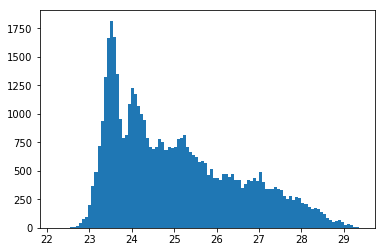

In [16]:
#histogram of the means per TS
plt.hist(data2.rowMean, bins=100)

(array([   6.,   10.,    9.,   28.,   29.,  107.,   64.,    0.,  272.,
         483.,  354.,  993., 1301.,  754., 1676.,    0.,  833., 1579.,
         741., 1369., 1252.,  624., 1157.,    0.,  957.,  391.,  782.,
         364.,  661.,  260.,    0.,  482.,  436.,  222.,  517.,  512.,
         251.,  440.,    0.,  239.,  446.,  240.,  588.,  632.,  286.,
         668.,    0.,  771.,  442.,  973.,  426.,  838.,  459.,    0.,
         929., 1042.,  597., 1378., 1519.,  759., 1461.,    0.,  610.,
        1121.,  547., 1134.,  915.,  479.,  902.,    0.,  857.,  369.,
         714.,  339.,  692.,  351.,    0.,  634.,  609.,  275.,  409.,
         340.,  140.,  317.,    0.,  187.,  317.,  117.,  163.,   90.,
          20.,   49.,    0.,   93.,   31.,   41.,   29.,   46.,   15.,
           2.]),
 array([28.1  , 28.187, 28.274, 28.361, 28.448, 28.535, 28.622, 28.709,
        28.796, 28.883, 28.97 , 29.057, 29.144, 29.231, 29.318, 29.405,
        29.492, 29.579, 29.666, 29.753, 29.84 , 29.927, 30

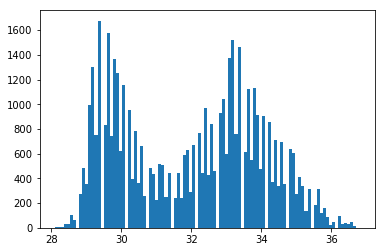

In [17]:
#histogram of a random sensor

plt.hist(data2.iloc[:,2], bins=100)

(array([1.000e+00, 0.000e+00, 1.400e+01, 9.000e+00, 1.800e+01, 2.900e+01,
        1.700e+01, 5.100e+01, 7.800e+01, 0.000e+00, 7.200e+01, 2.300e+02,
        2.070e+02, 7.260e+02, 6.510e+02, 1.563e+03, 1.841e+03, 8.290e+02,
        1.522e+03, 0.000e+00, 1.462e+03, 6.950e+02, 1.328e+03, 6.100e+02,
        1.223e+03, 6.640e+02, 1.492e+03, 1.564e+03, 7.320e+02, 0.000e+00,
        1.461e+03, 1.523e+03, 8.090e+02, 1.592e+03, 7.800e+02, 1.555e+03,
        8.000e+02, 1.712e+03, 1.690e+03, 0.000e+00, 8.180e+02, 1.506e+03,
        1.306e+03, 5.740e+02, 9.150e+02, 3.930e+02, 6.670e+02, 2.960e+02,
        5.020e+02, 0.000e+00, 5.480e+02, 2.530e+02, 4.980e+02, 5.340e+02,
        2.840e+02, 5.780e+02, 3.130e+02, 6.610e+02, 3.520e+02, 0.000e+00,
        6.700e+02, 6.970e+02, 3.160e+02, 6.240e+02, 6.090e+02, 2.790e+02,
        5.280e+02, 2.450e+02, 4.360e+02, 0.000e+00, 2.230e+02, 4.500e+02,
        4.020e+02, 1.690e+02, 3.070e+02, 2.630e+02, 1.340e+02, 1.840e+02,
        6.400e+01, 0.000e+00, 9.100e+0

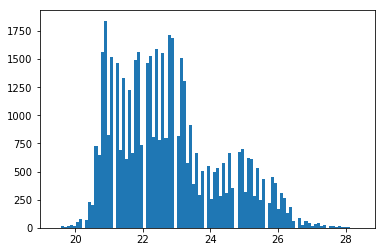

In [18]:
#of another one

plt.hist(data2.iloc[:,40], bins=100)

(array([1.000e+00, 3.000e+00, 5.000e+00, 1.000e+01, 2.500e+01, 2.200e+01,
        6.000e+01, 2.000e+01, 5.900e+01, 3.500e+01, 6.100e+01, 8.000e+01,
        0.000e+00, 7.000e+01, 3.490e+02, 6.240e+02, 4.080e+02, 1.286e+03,
        9.550e+02, 2.232e+03, 1.301e+03, 2.572e+03, 2.593e+03, 1.248e+03,
        0.000e+00, 2.038e+03, 1.563e+03, 6.390e+02, 1.043e+03, 4.370e+02,
        6.710e+02, 3.020e+02, 4.790e+02, 4.380e+02, 2.190e+02, 4.250e+02,
        4.290e+02, 0.000e+00, 2.320e+02, 4.900e+02, 2.550e+02, 5.060e+02,
        2.660e+02, 5.830e+02, 6.160e+02, 3.210e+02, 6.130e+02, 6.020e+02,
        2.740e+02, 0.000e+00, 5.510e+02, 2.850e+02, 6.040e+02, 3.130e+02,
        7.030e+02, 8.190e+02, 4.720e+02, 1.010e+03, 1.120e+03, 6.390e+02,
        1.153e+03, 6.260e+02, 0.000e+00, 1.209e+03, 5.540e+02, 9.680e+02,
        9.150e+02, 4.360e+02, 7.060e+02, 7.330e+02, 3.470e+02, 5.950e+02,
        2.510e+02, 4.480e+02, 0.000e+00, 2.410e+02, 5.860e+02, 6.200e+02,
        2.660e+02, 4.470e+02, 4.120e+0

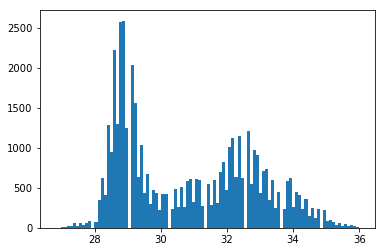

In [19]:
#of another one

plt.hist(data2.iloc[:,80], bins=100)

(array([1.000e+00, 5.000e+00, 1.400e+01, 0.000e+00, 1.700e+01, 4.400e+01,
        6.400e+01, 0.000e+00, 6.000e+01, 1.790e+02, 3.430e+02, 0.000e+00,
        2.750e+02, 6.910e+02, 4.060e+02, 0.000e+00, 1.164e+03, 7.610e+02,
        1.712e+03, 0.000e+00, 1.701e+03, 7.320e+02, 1.284e+03, 0.000e+00,
        1.268e+03, 6.550e+02, 0.000e+00, 1.490e+03, 9.470e+02, 2.238e+03,
        0.000e+00, 1.241e+03, 2.593e+03, 2.452e+03, 0.000e+00, 1.127e+03,
        2.161e+03, 1.851e+03, 0.000e+00, 8.610e+02, 1.731e+03, 7.850e+02,
        0.000e+00, 1.399e+03, 6.470e+02, 1.182e+03, 0.000e+00, 1.022e+03,
        5.220e+02, 0.000e+00, 1.120e+03, 1.019e+03, 5.050e+02, 0.000e+00,
        9.540e+02, 4.580e+02, 9.170e+02, 0.000e+00, 4.570e+02, 8.700e+02,
        7.500e+02, 0.000e+00, 3.290e+02, 6.260e+02, 5.890e+02, 0.000e+00,
        2.780e+02, 5.120e+02, 2.430e+02, 0.000e+00, 4.270e+02, 1.990e+02,
        3.690e+02, 0.000e+00, 3.010e+02, 1.410e+02, 0.000e+00, 2.230e+02,
        1.960e+02, 7.100e+01, 0.000e+0

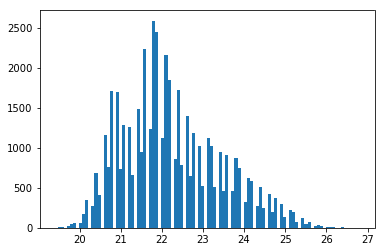

In [20]:
#of another one

plt.hist(data2.iloc[:,115], bins=100)

In [21]:
data2["TS"] = data2["TS"].apply(datetime.strptime, args=('%d-%m-%Y %H:%M:%S',))
type(data2["TS"][0])

pandas._libs.tslib.Timestamp

In [22]:
data2.head()

,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,...,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,rowMean
0,2020-06-05 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,33.1,...,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7,24.253175
1,2020-06-05 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,33.1,...,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9,24.307937
2,2020-06-05 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,33.1,...,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8,24.288889
3,2020-06-05 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,33.1,...,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8,24.239683
4,2020-06-05 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,33.2,...,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8,24.351587


In [23]:
data2.index = data2["TS"]
data2.head()

,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,...,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,rowMean
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:01:59,2020-06-05 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,33.1,...,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7,24.253175
2020-06-05 00:06:49,2020-06-05 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,33.1,...,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9,24.307937
2020-06-05 00:11:58,2020-06-05 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,33.1,...,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8,24.288889
2020-06-05 00:16:50,2020-06-05 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,33.1,...,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8,24.239683
2020-06-05 00:21:59,2020-06-05 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,33.2,...,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8,24.351587


In [24]:
type(data2.iloc[:,2].index)

pandas.core.indexes.datetimes.DatetimeIndex

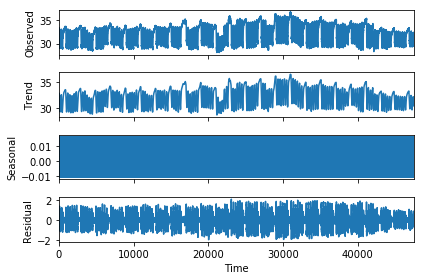

In [25]:
result = seasonal_decompose(np.array(data2.iloc[:,2]), freq=92, model='additive')
result.plot()
plt.show() #not satisfying

In [26]:
data3 = data2.copy()

In [27]:
#first difference... (we will five times take difference with lag of 1 --> hope to remove trend... afterwards try to remove seasonality)

series = np.array(data3.iloc[:,2])

series = series[1:] - series[0:-1]

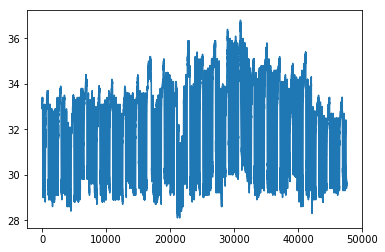

In [28]:
plt.plot(np.array(data3.iloc[:,2])) #without differencing --> reverting trend can be seen

In [29]:
series = np.append(0, series)
print(series)

[ 0.  -0.1  0.2 ...  0.   0.1  0. ]


(array([3.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 2.5000e+01,
        0.0000e+00, 0.0000e+00, 6.3000e+01, 0.0000e+00, 1.1300e+02,
        0.0000e+00, 2.4800e+02, 0.0000e+00, 0.0000e+00, 5.4500e+02,
        0.0000e+00, 1.2770e+03, 0.0000e+00, 0.0000e+00, 3.7170e+03,
        0.0000e+00, 8.6870e+03, 0.0000e+00, 1.7426e+04, 0.0000e+00,
        0.0000e+00, 9.4910e+03, 0.0000e+00, 3.8970e+03, 0.0000e+00,
        1.2860e+03, 0.0000e+00, 0.0000e+00, 4.8000e+02, 0.0000e+00,
        2.0300e+02, 0.0000e+00, 0.0000e+00, 5.7000e+01, 0.0000e+00,
        2.2000e+01, 0.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.   , -0.958, -0.916, -0.874, -0.832, -0.79 , -0.748, -0.706,
        -0.664, -0.622, -0.58 , -0.538, -0.496, -0.454, -0.412, -0.37 ,
        -0.328, -0.286, -0.244, -0.202, -0.16 , -0.118, -0.076, -0.034,
         0.008,  0.05 ,  0.092,  0.134,  0.176,  0.218,  0.26 ,  0.302,
         0.344,  0.386,  0.428

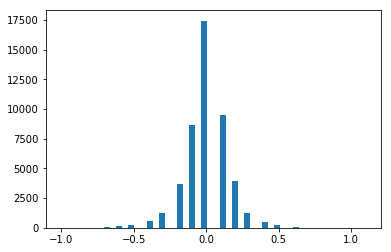

In [30]:
plt.hist(series, bins=50)

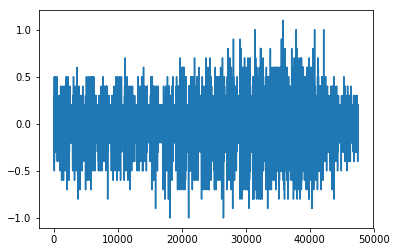

In [31]:
plt.plot(series)

In [36]:
#same for another sensor!

series2 = np.array(data3.iloc[:,115])

series2 = series2[1:] - series2[0:-1]

In [37]:
series2 = np.append(0, series2)
print(series2)

[ 0.   0.3 -0.2 ...  0.   0.   0.1]


(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 3.8000e+01,
        3.0000e+01, 9.1000e+01, 5.1400e+02, 7.9400e+02, 1.4110e+03,
        8.1160e+03, 7.1890e+03, 1.0183e+04, 1.3616e+04, 2.9480e+03,
        1.4600e+03, 9.6200e+02, 1.1500e+02, 4.8000e+01, 2.5000e+01,
        5.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-3.   , -2.866, -2.732, -2.598, -2.464, -2.33 , -2.196, -2.062,
        -1.928, -1.794, -1.66 , -1.526, -1.392, -1.258, -1.124, -0.99 ,
        -0.856, -0.722, -0.588, -0.454, -0.32 , -0.186, -0.052,  0.082,
         0.216,  0.35 ,  0.484,  0.618,  0.752,  0.886,  1.02 ,  1.154,
         1.288,  1.422,  1.556

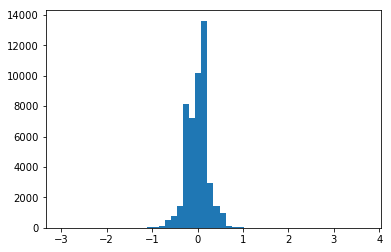

In [38]:
plt.hist(series2, bins=50)

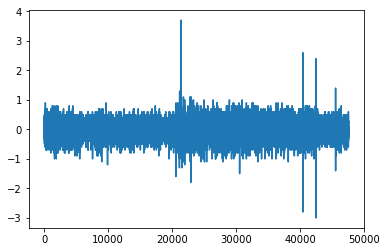

In [39]:
plt.plot(series2)

In [40]:
#we could test more differences (and also with different lags)

In [ ]:
#more approaches would be to remove seasonality with larger lags (of 1 day for day/night seasonality, week for weekend seasonality)
#smooth out the temperature data by taking the average over e.g. 3 consecutive temps  --> less random noise in differences!!! (???)

In [41]:
#remove seasonality by difference to same time of previous week (caution: need to handle missing values)
#lag of 1 week: 2016 (so many 5 min time ranges)

series10 = np.array(data3.iloc[:,2])

series10 = series10[2016:] - series10[0:-2016]
print(series10)

[-0.3 -0.3 -0.4 ... -0.4 -0.1 -0.2]


(array([  11.,   13.,   17.,   33.,   20.,   14.,   22.,   14.,   25.,
          64.,   84.,   97.,  170.,  128.,  121.,  239.,  242.,  371.,
        1061., 1071., 1309., 3058., 2721., 3797., 4591., 6663., 4835.,
        3843., 4213., 1860., 1254., 1146.,  643.,  498.,  400.,  146.,
         121.,  101.,   68.,   86.,  122.,   80.,   44.,   32.,   18.,
           8.,   19.,   10.,   17.,   27.]),
 array([-5.9  , -5.668, -5.436, -5.204, -4.972, -4.74 , -4.508, -4.276,
        -4.044, -3.812, -3.58 , -3.348, -3.116, -2.884, -2.652, -2.42 ,
        -2.188, -1.956, -1.724, -1.492, -1.26 , -1.028, -0.796, -0.564,
        -0.332, -0.1  ,  0.132,  0.364,  0.596,  0.828,  1.06 ,  1.292,
         1.524,  1.756,  1.988,  2.22 ,  2.452,  2.684,  2.916,  3.148,
         3.38 ,  3.612,  3.844,  4.076,  4.308,  4.54 ,  4.772,  5.004,
         5.236,  5.468,  5.7  ]),
 <a list of 50 Patch objects>)

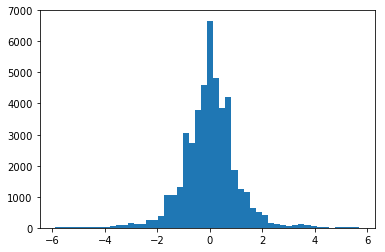

In [42]:
plt.hist(series10, bins=50)

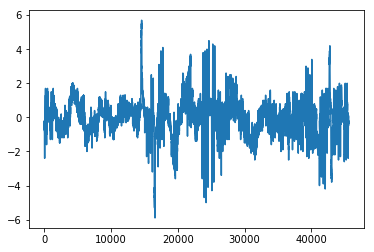

In [43]:
plt.plot(series10)

In [ ]:
#could now continue with building differences... still difficult because seasons don't have a constang length.

In [44]:
#stationary tests --> low p-value means stationary, like here!!! (used augmented dickey fuller test)

result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -38.734697
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.430


In [45]:
result = adfuller(series2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -28.652233
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.430


In [46]:
result = adfuller(series10)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.005486
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.430


In [47]:
#will continue with lag = 1 single difference for now!

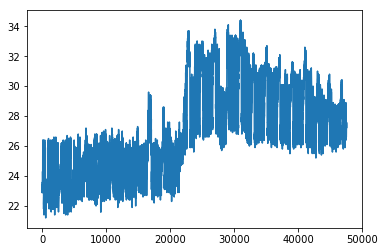

In [48]:
#test another example

plt.plot(np.array(data3.iloc[:,100]))

(array([  11.,   25.,   90.,  372.,  634.,  646., 1461., 1829., 1102.,
        1655., 1625., 1090., 1679.,  919., 1625., 1876., 1090., 1942.,
        1985., 1504., 2182., 2810., 2141., 1348.,  834., 1086.,  929.,
         518.,  908.,  956.,  627.,  999.,  977.,  544.,  863.,  767.,
         735.,  809.,  493.,  632.,  752.,  520.,  527.,  570.,  264.,
         293.,  194.,   79.,   42.,    4.]),
 array([21.2  , 21.464, 21.728, 21.992, 22.256, 22.52 , 22.784, 23.048,
        23.312, 23.576, 23.84 , 24.104, 24.368, 24.632, 24.896, 25.16 ,
        25.424, 25.688, 25.952, 26.216, 26.48 , 26.744, 27.008, 27.272,
        27.536, 27.8  , 28.064, 28.328, 28.592, 28.856, 29.12 , 29.384,
        29.648, 29.912, 30.176, 30.44 , 30.704, 30.968, 31.232, 31.496,
        31.76 , 32.024, 32.288, 32.552, 32.816, 33.08 , 33.344, 33.608,
        33.872, 34.136, 34.4  ]),
 <a list of 50 Patch objects>)

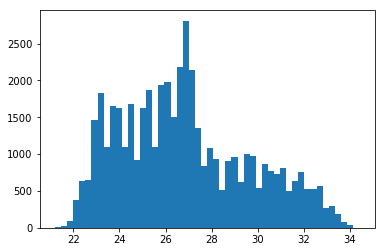

In [49]:
plt.hist(np.array(data3.iloc[:,100]), bins=50)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 6.000e+00,
        9.000e+00, 9.000e+00, 1.600e+01, 2.800e+01, 4.300e+01, 8.900e+01,
        1.010e+02, 2.040e+02, 2.430e+02, 4.260e+02, 6.240e+02, 9.250e+02,
        1.540e+03, 2.262e+03, 3.364e+03, 4.762e+03, 5.384e+03, 7.091e+03,
        2.661e+03, 2.948e+03, 4.861e+03, 3.426e+03, 2.332e+03, 1.560e+03,
        9.450e+02, 5.980e+02, 4.320e+02, 2.310e+02, 1.680e+02, 9.200e+01,
        8.300e+01, 4.100e+01, 1.700e+01, 1.400e+01, 5.000e+00, 4.000e+00,
        5.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2.3  , -2.204, -2.108, -2.012, -1.916, -1.82 , -1.724, -1.628,
        -1.532, -1.436, -1.34 , -1.244, -1.148, -1.052, -0.956, -0.86 ,
        -0.764, -0.668, -0.572, -0.476, -0.38 , -0.284, -0.188, -0.092,
         0.004,  0.1  ,  0.196,  0.292,  0.388,  0.484,  0.58 ,  0.676,
         0.772,  0.868,  0.964,  1.06 ,  1.156,  1.252,  1.348,  1.444,
         1.54 , 

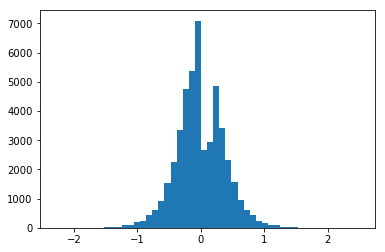

In [50]:
seriesTest1 = np.array(data3.iloc[:,100])

seriesTest1 = seriesTest1[1:] - seriesTest1[0:-1]
seriesTest1 = np.append(0, seriesTest1)

plt.hist(seriesTest1, bins=50)

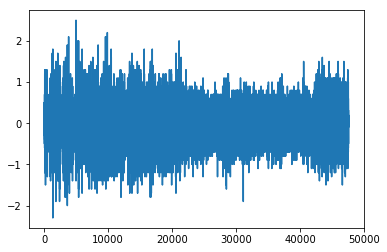

In [51]:
plt.plot(seriesTest1)

In [52]:
result = adfuller(seriesTest1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -41.322278
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.430


In [53]:
data3.head()

,TS,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,...,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,rowMean
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:01:59,2020-06-05 00:01:59,26.8,33.0,22.4,31.7,30.6,20.9,32.1,21.2,33.1,...,21.8,20.8,20.9,25.6,32.7,22.1,20.9,22.0,21.7,24.253175
2020-06-05 00:06:49,2020-06-05 00:06:49,26.8,32.9,22.6,31.1,30.4,21.2,31.5,21.5,33.1,...,21.8,20.9,21.1,25.3,32.6,22.2,21.1,22.2,21.9,24.307937
2020-06-05 00:11:58,2020-06-05 00:11:58,26.8,33.1,22.4,31.4,30.1,20.9,31.7,21.2,33.1,...,21.7,20.8,21.0,26.1,32.7,22.1,20.9,22.1,21.8,24.288889
2020-06-05 00:16:50,2020-06-05 00:16:50,26.8,33.1,22.4,31.4,30.2,20.9,31.9,21.2,33.1,...,21.6,20.8,20.9,26.4,32.6,22.1,20.8,22.1,21.8,24.239683
2020-06-05 00:21:59,2020-06-05 00:21:59,27.4,33.1,22.8,31.6,30.5,21.1,31.9,21.5,33.2,...,21.9,20.9,21.0,25.5,32.8,22.2,21.0,22.2,21.8,24.351587


In [54]:
transformation = np.array(data3.iloc[:,1:-1])

print(transformation)

[[26.8 33.  22.4 ... 20.9 22.  21.7]
 [26.8 32.9 22.6 ... 21.1 22.2 21.9]
 [26.8 33.1 22.4 ... 20.9 22.1 21.8]
 ...
 [27.9 29.5 24.4 ... 19.1 21.5 20.1]
 [28.  29.6 24.8 ... 18.9 21.  19.9]
 [28.  29.6 24.7 ... 19.1 21.4 20.2]]


In [55]:
print(transformation.shape)

(47563, 126)


In [56]:
print(transformation[:,0]) #prints column1

[26.8 26.8 26.8 ... 27.9 28.  28. ]


In [57]:
print(transformation[0]) #prints row1

[26.8 33.  22.4 31.7 30.6 20.9 32.1 21.2 33.1 21.9 32.2 31.8 22.2 21.2
 22.4 25.2 21.3 30.6 29.6 21.4 22.6 22.3 22.4 21.2 31.  29.3 32.7 20.8
 21.6 31.7 32.4 27.4 32.8 21.9 23.6 21.4 21.8 20.9 24.1 21.9 21.4 32.7
 21.  23.1 32.8 23.8 20.8 21.4 20.9 23.4 21.4 18.2 21.2 31.2 22.8 20.9
 22.2 29.1 21.6 22.1 20.8 23.6 20.8 21.1 23.1 21.6 20.8 31.9 25.3 22.7
 21.3 21.1 21.8 33.  26.  22.2 21.9 22.5 21.1 31.1 23.9 22.1 21.5 21.2
 24.5 21.6 24.4 22.8 20.9 21.1 20.8 20.5 21.  22.4 24.9 32.2 21.9 20.9
 21.  22.9 20.8 32.4 23.9 21.8 20.9 22.9 21.9 20.9 31.6 21.8 21.1 28.1
 22.4 21.1 21.6 28.1 32.5 21.8 20.8 20.9 25.6 32.7 22.1 20.9 22.  21.7]


In [58]:
transformation = transformation[1:] - transformation[0:-1]

transformation = np.concatenate((np.zeros([1, 126]), transformation))
print(transformation.shape)

(47563, 126)


In [59]:
#test

print(transformation[200:,1] == series[200:])

[ True  True  True ...  True  True  True]


In [60]:
np.mean(transformation[:,1] == series[:]) #correct

1.0

In [62]:
data4 = pd.DataFrame(transformation, index = data3["TS"], columns = data3.columns[1:-1])

data4.iloc[10:12, :]

,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,28.0A74D30B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:51:49,0.2,0.1,-0.3,0.4,-0.2,0.0,-0.3,0.0,0.1,0.0,...,0.2,-0.1,0.1,0.0,0.3,0.1,-0.1,0.0,0.0,0.0
2020-06-05 00:56:58,-0.4,0.0,0.1,-0.4,0.0,0.1,0.2,0.1,0.0,-0.1,...,-0.2,0.1,0.1,0.1,-0.1,-0.1,0.0,0.1,-0.1,0.1


In [63]:
data4.head()

,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,28.0A74D30B0000,...,28.F610D40B0000,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:01:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-05 00:06:49,0.0,-0.1,0.2,-0.6,-0.2,0.3,-0.6,0.3,0.0,0.2,...,-0.1,0.0,0.1,0.2,-0.3,-0.1,0.1,0.2,0.2,0.2
2020-06-05 00:11:58,0.0,0.2,-0.2,0.3,-0.3,-0.3,0.2,-0.3,0.0,0.0,...,0.0,-0.1,-0.1,-0.1,0.8,0.1,-0.1,-0.2,-0.1,-0.1
2020-06-05 00:16:50,0.0,0.0,0.0,0.0,0.1,0.0,0.2,0.0,0.0,-0.1,...,0.1,-0.1,0.0,-0.1,0.3,-0.1,0.0,-0.1,0.0,0.0
2020-06-05 00:21:59,0.6,0.0,0.4,0.2,0.3,0.2,0.0,0.3,0.1,0.1,...,0.1,0.3,0.1,0.1,-0.9,0.2,0.1,0.2,0.1,0.0


In [64]:
##now set up the anomaly detection --> model the data as multivariate gaussian

In [65]:
#we need to estimate covariance matrix and mean vector for all sensors --> over 5000 parameters

In [66]:
#in order to check results: First with matrix multiplication
transformation2 = transformation.copy()

In [74]:
#let out the firs row. fit parameters with 39000 examples
means = np.mean(transformation2[1:39000,:], axis=0)

In [75]:
means.shape #126 means

(126,)

In [76]:
means #means actually change a lot, if we change training sample size (not true --> order is of around e^-5)

array([1.35900921e-04, 3.33341881e-05, 1.53850099e-04, 3.84625247e-05,
       6.41042078e-05, 3.33341881e-05, 4.10266930e-05, 4.10266930e-05,
       3.84625247e-05, 8.46175543e-05, 4.61550296e-05, 5.12833662e-05,
       1.07695069e-04, 3.58983564e-05, 1.20515911e-04, 1.74363445e-04,
       2.05133465e-05, 5.64117029e-05, 8.20533860e-05, 4.61550296e-05,
       1.79491782e-04, 7.17967127e-05, 1.84620118e-04, 3.58983564e-05,
       5.89758712e-05, 9.74383959e-05, 3.58983564e-05, 2.56416831e-05,
       4.10266930e-05, 5.38475346e-05, 3.33341881e-05, 1.38465089e-04,
       2.82058514e-05, 9.74383959e-05, 1.74363445e-04, 1.53850099e-05,
       4.10266930e-05, 1.53850099e-05, 1.89748455e-04, 6.92325444e-05,
       2.30775148e-05, 4.35908613e-05, 3.84625247e-05, 1.89748455e-04,
       3.58983564e-05, 1.97440960e-04, 2.56416831e-05, 3.84625247e-05,
       2.82058514e-05, 2.05133465e-04, 1.28208416e-05, 9.48742275e-05,
       1.53850099e-05, 4.61550296e-05, 1.92312623e-04, 2.30775148e-05,
      

In [97]:
input1 = np.transpose(transformation2[1:39000,:])
covMatrix = np.cov(input1) #parameter fitting (maybe it would be better to start at 10'000 or smth or weigh the first examples less)

In [98]:
covMatrix.shape

(126, 126)

In [100]:
covMatrix[0:10,0:10] #change slightly with different training sizes --> grouping could deliver more stable results here (less parameters to estimate)

array([[ 0.11747601,  0.01140007,  0.00946764,  0.02902302,  0.03838786,
        -0.00252449,  0.03066285, -0.0021237 ,  0.00797784,  0.00614159],
       [ 0.01140007,  0.02364865,  0.00146776,  0.01649418,  0.00963126,
         0.00177624,  0.01534207,  0.00222498,  0.01171445,  0.0034853 ],
       [ 0.00946764,  0.00146776,  0.10265498,  0.00426201,  0.00740063,
         0.00850479,  0.00482742,  0.01457561,  0.00230165,  0.04522795],
       [ 0.02902302,  0.01649418,  0.00426201,  0.05120698,  0.01841992,
        -0.00151059,  0.02807862, -0.00128417,  0.00950408,  0.00243704],
       [ 0.03838786,  0.00963126,  0.00740063,  0.01841992,  0.05489486,
        -0.00018283,  0.03366301,  0.00113159,  0.01158469,  0.00459767],
       [-0.00252449,  0.00177624,  0.00850479, -0.00151059, -0.00018283,
         0.03948946, -0.00089338,  0.02670111,  0.00201703,  0.01641751],
       [ 0.03066285,  0.01534207,  0.00482742,  0.02807862,  0.03366301,
        -0.00089338,  0.0596928 ,  0.00033463

In [101]:
#first apply the multivariate gaussian distribution to calculate the probability for all training examples with the fitted parameters
#then determine a treshhold

multivar = multivariate_normal(mean=means, cov=covMatrix)

In [102]:
probabilityDensitiesTrain = multivar.pdf(transformation2[1:39000,:])

In [103]:
probabilityDensitiesTrain.shape

(38999,)

In [104]:
probabilityDensitiesTrain

array([1.42389804e+35, 3.60570600e+37, 3.37036250e+37, ...,
       7.85820385e+24, 1.17628914e+30, 5.22330237e+33])

In [105]:
probabilityDensitiesTrain.max() #min is even zero...

9.063589185691949e+51

In [106]:
probabilityDensitiesTrain.min()

0.0

In [107]:
probabilityDensitiesTrain[100:110]

array([4.78292013e+33, 2.16056339e+36, 3.52254898e+48, 1.18645654e+36,
       2.98227408e+25, 2.05905582e+43, 6.11673988e+34, 3.53772615e+37,
       9.03141707e+37, 2.12202783e+37])

In [108]:
quantiles = np.percentile(probabilityDensitiesTrain, [10, 5, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01])

In [109]:
print(quantiles)

[8.32870487e+027 7.30521486e+024 8.78027293e+020 9.44309322e+017
 2.46050940e+014 3.74145630e+008 7.90625123e+001 1.38116091e-016
 4.09540610e-078 4.11427887e-186]


In [111]:
#choosing the 0.05% treshhold for now, now it's much smaller --> indication for anomalies!

treshhold = quantiles[7]
print(treshhold)

1.3811609138728606e-16


In [116]:
#calculate all probability densities (train and test (starting from obs. 30'000))
probabilityDensities = multivar.pdf(transformation2[1:,:])

In [117]:
probabilityDensities.shape #only for the first timestamp we have no density because of the lag 1 difference

(47562,)

In [118]:
probabilityDensities = np.concatenate((np.zeros([1, ]), probabilityDensities))

probabilityDensities.shape

(47563,)

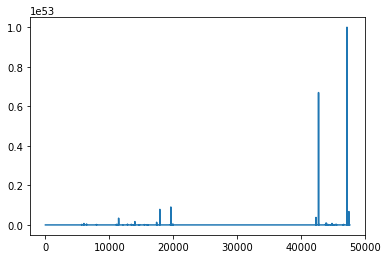

In [119]:
plt.plot(probabilityDensities) #not a good scale...

In [120]:
data4["probDensities"] = probabilityDensities

data4.iloc[10:16, :]

,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,28.0A74D30B0000,...,28.F6B5D40B0000,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,probDensities
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:51:49,0.2,0.1,-0.3,0.4,-0.2,0.0,-0.3,0.0,0.1,0.0,...,-0.1,0.1,0.0,0.3,0.1,-0.1,0.0,0.0,0.0,1.607992e+41
2020-06-05 00:56:58,-0.4,0.0,0.1,-0.4,0.0,0.1,0.2,0.1,0.0,-0.1,...,0.1,0.1,0.1,-0.1,-0.1,0.0,0.1,-0.1,0.1,2.514769e+38
2020-06-05 01:01:59,0.5,0.0,0.0,-0.2,0.4,0.1,0.0,-0.1,0.0,0.1,...,0.0,0.0,0.1,0.0,-0.1,0.2,0.0,0.2,0.0,2.551195e+35
2020-06-05 01:06:49,0.2,-0.1,-0.1,0.1,-0.2,-0.1,0.0,0.2,0.0,0.0,...,-0.1,-0.1,-0.1,-0.2,0.1,0.0,-0.1,-0.1,0.0,4.770600e+37
2020-06-05 01:11:58,-0.2,0.1,0.0,-0.1,-0.3,0.0,-0.2,-0.2,0.0,0.0,...,0.0,0.1,0.1,-0.3,0.0,0.0,0.1,0.1,0.1,1.379311e+40
2020-06-05 01:16:49,0.5,0.0,0.2,0.5,0.4,-0.2,0.5,-0.1,0.1,-0.1,...,0.0,-0.2,-0.2,1.5,0.0,-0.2,-0.2,-0.2,-0.3,1.307046e+34


In [121]:
data4["Anomaly"] = data4["probDensities"] < treshhold

In [122]:
data4.iloc[10:16, :]

,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,28.0A74D30B0000,...,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,probDensities,Anomaly
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:51:49,0.2,0.1,-0.3,0.4,-0.2,0.0,-0.3,0.0,0.1,0.0,...,0.1,0.0,0.3,0.1,-0.1,0.0,0.0,0.0,1.607992e+41,False
2020-06-05 00:56:58,-0.4,0.0,0.1,-0.4,0.0,0.1,0.2,0.1,0.0,-0.1,...,0.1,0.1,-0.1,-0.1,0.0,0.1,-0.1,0.1,2.514769e+38,False
2020-06-05 01:01:59,0.5,0.0,0.0,-0.2,0.4,0.1,0.0,-0.1,0.0,0.1,...,0.0,0.1,0.0,-0.1,0.2,0.0,0.2,0.0,2.551195e+35,False
2020-06-05 01:06:49,0.2,-0.1,-0.1,0.1,-0.2,-0.1,0.0,0.2,0.0,0.0,...,-0.1,-0.1,-0.2,0.1,0.0,-0.1,-0.1,0.0,4.770600e+37,False
2020-06-05 01:11:58,-0.2,0.1,0.0,-0.1,-0.3,0.0,-0.2,-0.2,0.0,0.0,...,0.1,0.1,-0.3,0.0,0.0,0.1,0.1,0.1,1.379311e+40,False
2020-06-05 01:16:49,0.5,0.0,0.2,0.5,0.4,-0.2,0.5,-0.1,0.1,-0.1,...,-0.2,-0.2,1.5,0.0,-0.2,-0.2,-0.2,-0.3,1.307046e+34,False


In [124]:
#...

In [125]:
#...

In [126]:
data4[data4["Anomaly"]==True] #39 Anomalies detected! --> appear to be the right ones!!!!

,28.0211D40B0000,28.024CD30B0000,28.02B6D40B0000,28.02CAD30B0000,28.0556D40B0000,28.074CD30B0000,28.0943D40B0000,28.096CD40B0000,28.09F7D30B0000,28.0A74D30B0000,...,28.F6C9D30B0000,28.F6DCD30B0000,28.F7B5D40B0000,28.F910D40B0000,28.FA54D40B0000,28.FAF5D30B0000,28.FAF6D30B0000,28.FD6BD40B0000,probDensities,Anomaly
TS,,,,,,,,,,,,,,,,,,,,,
2020-06-05 00:01:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,True
2020-08-15 11:36:52,-0.3,-0.1,1.8,0.5,0.3,1.2,0.2,1.1,-0.1,0.3,...,0.0,0.1,-0.1,0.1,-0.1,0.5,-0.1,-0.2,1.330739e-60,True
2020-08-15 13:06:45,1.6,0.5,-2.9,0.0,0.8,-1.3,0.5,-2.0,0.4,-0.9,...,-0.1,0.1,0.0,0.4,0.0,-1.0,-0.1,-0.1,1.493336e-153,True
2020-08-18 09:41:50,0.4,0.1,0.1,0.3,0.3,1.7,0.4,0.2,0.2,-0.1,...,0.0,-0.1,1.1,0.6,-0.2,0.0,-0.1,0.8,4.942672e-89,True
2020-08-18 09:46:52,0.3,0.5,2.4,0.5,-0.4,2.5,0.2,3.7,-0.1,3.7,...,2.2,0.8,0.2,0.3,3.0,3.7,3.0,2.2,0.000000e+00,True
2020-08-18 12:31:50,0.2,-0.2,0.5,0.0,0.5,0.9,0.1,0.5,0.5,0.9,...,0.1,-0.2,0.5,-0.8,0.6,0.8,0.6,0.6,6.255424e-29,True
2020-08-18 13:46:44,-0.4,-0.5,-0.8,-0.3,-0.5,-0.4,-0.6,-0.6,-0.9,-0.7,...,0.0,0.0,-0.8,0.3,-0.3,-0.4,-0.1,-0.4,4.250324e-49,True
2020-08-18 15:46:44,0.6,-0.1,-1.0,-0.7,0.2,-0.4,-0.5,-0.5,-0.2,0.1,...,-1.2,-0.9,-0.3,-0.1,0.5,-1.2,0.5,0.2,5.121819e-78,True
2020-08-18 19:01:51,-0.9,0.3,-0.9,0.0,-1.3,-1.3,-0.9,-1.3,0.2,-1.4,...,-1.0,0.3,-0.6,-0.2,-1.9,-1.7,-1.9,-1.9,0.000000e+00,True


In [ ]:
#Also create additional plots!!!

In [127]:
results = data4.iloc[:,-2:]

results.head() #exactly the 0 rows

,probDensities,Anomaly
TS,,
2020-06-05 00:01:59,0.000000e+00,True
2020-06-05 00:06:49,1.423898e+35,False
2020-06-05 00:11:58,3.605706e+37,False
2020-06-05 00:16:50,3.370363e+37,False
2020-06-05 00:21:59,5.977247e+34,False


In [129]:
#results.to_csv("results2.csv") --> in order to integrate to tableau workbook for visualisations!

In [ ]:
#group the sensors in order to reduce the dimensions (features) but with the constaint to lose as less signal as possible
#our approach for grouping: group nereby sensors together because this makes sense from a physical perspective
#-->Marc prepared a file to do so

#another approach would be grouping by clustering as proposed by Natasha Savic (don't know exactly how, since we
#usually cluster datapoints and not "features").
#A third approach could be dimensionality reduction with principal component analysis (PCA)

#need to wait for the sensor ID dictionary in order to be able to group the sensors!